In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pylab as plt
from math import sqrt

In [39]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

dir_datasets = "./Datasets_original/"

In [5]:
file_name1 = dir_origen_csv + "medidores_casi_uniformes2.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df

,fecha,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,Longitud,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
0,2019-04-04 06:28:44,15029835,1142597,131.1979,127.9215,131.9837,0.0263,0.0017,0.0264,A3,...,-79.4733,IGLESIA,0.4500,0.0000,bajo,7,0,0,0.225000,14
1,2019-04-04 08:28:44,15029835,1143023,128.4270,127.4788,129.9663,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.1830,0.0090,bajo,7,0,0,0.091500,14
2,2019-04-04 10:28:44,15029835,1143417,125.9862,125.7077,128.2971,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.048000,14
3,2019-04-04 12:28:45,15029835,1143779,126.8655,126.0735,128.6225,0.0013,0.0016,0.0114,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.047993,14
4,2019-04-04 14:28:45,15029835,1144165,125.2453,123.8318,127.2888,0.1740,0.0020,0.0110,A3,...,-79.4733,IGLESIA,0.1230,0.0000,bajo,7,0,0,0.061500,14
5,2019-04-04 16:28:45,15029835,1144530,125.9855,125.0129,128.1258,0.0013,0.0017,0.0112,A3,...,-79.4733,IGLESIA,0.2490,0.0000,bajo,7,0,0,0.124500,14
6,2019-04-05 06:28:47,15029835,1147537,129.0491,127.8222,130.0290,0.0266,0.0017,0.0263,A3,...,-79.4733,IGLESIA,0.4470,0.0000,bajo,7,0,0,0.223500,14
7,2019-04-05 08:28:47,15029835,1147941,127.9209,127.1520,129.3010,0.0013,0.0016,0.0113,A3,...,-79.4733,IGLESIA,0.1650,0.0120,bajo,7,0,0,0.082500,14
8,2019-04-05 10:28:48,15029835,1148346,126.8511,126.2283,128.2661,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0930,0.0000,bajo,7,0,0,0.046494,14
9,2019-04-05 12:55:05,15029835,1148711,125.7741,124.2303,127.2888,0.0015,0.0016,0.0111,A3,...,-79.4733,IGLESIA,0.0720,0.0000,bajo,7,0,0,0.029532,14


In [6]:
df["medidor"].unique()

array([15029835, 15029844, 15029846, 15029847, 15029977, 15842885,
       15842894, 16567743, 16567746, 16567760, 16567761, 16567763,
       16951175, 16951176, 16951180, 16951199, 16951201, 16951203,
       16951205, 16951207, 16951208, 16951209, 16951216, 16951219,
       16951220, 16951221, 16951222, 28006904, 28877074, 35924863,
       35924864, 35924866, 35924882, 35925134, 35925291, 35925294,
       35925308, 35925506, 35946575, 35947190, 41175730, 52071447,
       52073194, 52073200, 52073201, 52073218, 52073240, 52073290,
       52073292, 52073295, 52073302, 52073321, 52073345, 52073348,
       52073352, 52073359, 52073382, 53307830, 53307859, 53307871,
       53444735, 58706632, 58706634, 58706655, 58706659, 58706662,
       58706663, 58706704, 58706706, 58706725, 58706740, 59814806],
      dtype=int64)

In [7]:
s=df["medidor"].unique()
df_cond=pd.DataFrame(s,columns=['medidor'])
df_cond

,medidor
0,15029835
1,15029844
2,15029846
3,15029847
4,15029977
5,15842885
6,15842894
7,16567743
8,16567746
9,16567760


In [8]:
medidores = list(df["medidor"].unique())
for i,m in enumerate(medidores):
    contador = df[df["powerfactorsystem"] < 0.6][["medidor","powerfactorsystem"]][df["medidor"]==m].count()["powerfactorsystem"]
    mediciones_totales=len(df[df["medidor"]==m])
    factor=contador/mediciones_totales
    df_cond.loc[i,'eventoFpM0.6']=factor

In [9]:
df_cond.set_index('medidor')

,eventoFpM0.6
medidor,
15029835,0.036082
15029844,0.016260
15029846,0.000000
15029847,0.002857
15029977,0.017456
15842885,1.000000
15842894,1.000000
16567743,0.000000
16567746,0.951429


In [10]:
A=df_cond.copy().set_index('medidor')
A.iloc[:, 0:]

,eventoFpM0.6
medidor,
15029835,0.036082
15029844,0.016260
15029846,0.000000
15029847,0.002857
15029977,0.017456
15842885,1.000000
15842894,1.000000
16567743,0.000000
16567746,0.951429


k: 1  cost: 7.390397702331837
k: 2  cost: 0.5074316358553645
k: 3  cost: 0.15260267028194938
k: 4  cost: 0.07944328768500748
k: 5  cost: 0.03583877990435817
k: 6  cost: 0.01802772034647463
k: 7  cost: 0.011143043856175757
k: 8  cost: 0.006338443670658582
k: 9  cost: 0.00400412205307235


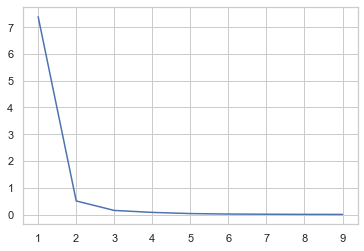

In [11]:
from sklearn.cluster import KMeans
 

x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:,:])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=A.iloc[:,:].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [13]:
kmeans.cluster_centers_

array([[0.01494783],
       [0.64112244],
       [0.98991414]])

In [14]:
distance=kmeans.fit_transform(X)
distance

array([[0.02113464, 0.60503997, 0.95383166],
       [0.00131233, 0.62486228, 0.97365397],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01209069, 0.6382653 , 0.98705699],
       [0.00250852, 0.62366608, 0.97245778],
       [0.98505217, 0.35887756, 0.01008586],
       [0.98505217, 0.35887756, 0.01008586],
       [0.01494783, 0.64112244, 0.98991414],
       [0.93648074, 0.31030613, 0.03848557],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01494783, 0.64112244, 0.98991414],
       [0.98505217, 0.35887756, 0.01008586],
       [0.01494783, 0.64112244, 0.98991414],
       [0.96815076, 0.34197615, 0.00681555],
       [0.98505217, 0.35887756, 0.01008586],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01494783, 0.64112244, 0.98991414],
       [0.01494783, 0.64112244, 0.98991414],
       [0.

In [15]:
labels=kmeans.labels_
labels

array([0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0])

In [16]:
A['ClustersConsumoMesFranjas'] = labels
A

,eventoFpM0.6,ClustersConsumoMesFranjas
medidor,,
15029835,0.036082,0
15029844,0.016260,0
15029846,0.000000,0
15029847,0.002857,0
15029977,0.017456,0
15842885,1.000000,2
15842894,1.000000,2
16567743,0.000000,0
16567746,0.951429,2


In [55]:
df_fp_general =df.groupby('medidor').mean()

In [56]:
df_fp_general 

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,frecuencia,Latitud,Longitud,kwh_consumido,kvarh_consumido,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,59.999705,-1.56845,-79.4733,2.875879,9.069278e-01,7.0,0.0,0.0,1.431671,18.234536
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,59.999389,-1.62801,-79.5566,6.845073,4.454179e+00,2.0,0.0,0.0,3.348749,18.276423
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,59.999882,-1.54981,-79.7512,336.749213,4.221768e-01,2.0,0.0,0.0,168.213021,18.314363
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,59.993862,-1.79919,-79.5334,26.557457,2.158543e+00,11.0,0.0,0.0,12.857209,18.225714
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,59.998495,-1.44379,-79.7628,30.488095,1.868517e+01,2.0,0.0,0.0,15.527462,18.324190
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,60.001283,-1.79843,-79.5270,7.565472,1.624783e+00,19.0,0.0,0.0,3.717700,18.270053
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,60.000571,-1.84812,-79.5505,17.281808,6.498129e+00,1.0,0.0,0.0,8.547837,18.300268
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,59.999677,-1.79777,-79.5306,9.362326,3.829803e-01,8.0,0.0,0.0,4.604326,18.185393
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,60.000229,-1.78370,-79.6816,12.438849,7.976846e+00,2.0,0.0,0.0,5.986971,18.205714


In [60]:
df_factorp_medidores=  df_fp_general.merge(A, left_on='medidor', right_on='medidor')
df_factorp_medidores

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,Longitud,kwh_consumido,kvarh_consumido,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,eventoFpM0.6,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,-79.4733,2.875879,9.069278e-01,7.0,0.0,0.0,1.431671,18.234536,0.036082,0
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,-79.5566,6.845073,4.454179e+00,2.0,0.0,0.0,3.348749,18.276423,0.016260,0
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,-79.7512,336.749213,4.221768e-01,2.0,0.0,0.0,168.213021,18.314363,0.000000,0
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,-79.5334,26.557457,2.158543e+00,11.0,0.0,0.0,12.857209,18.225714,0.002857,0
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,-79.7628,30.488095,1.868517e+01,2.0,0.0,0.0,15.527462,18.324190,0.017456,0
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,-79.5270,7.565472,1.624783e+00,19.0,0.0,0.0,3.717700,18.270053,1.000000,2
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,-79.5505,17.281808,6.498129e+00,1.0,0.0,0.0,8.547837,18.300268,1.000000,2
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,-79.5306,9.362326,3.829803e-01,8.0,0.0,0.0,4.604326,18.185393,0.000000,0
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,-79.6816,12.438849,7.976846e+00,2.0,0.0,0.0,5.986971,18.205714,0.951429,2


In [70]:
file_nameMedidores = dir_datasets + "Clasificación_Medidores.csv"
df_names= pd.read_csv(file_nameMedidores, low_memory = False, sep=",")
df_names

,CLASIFICACION,MEDIDOR
0,SUBESTACION,16567737
1,SUBESTACION,16567738
2,SUBESTACION,16567739
3,SUBESTACION,16567740
4,SUBESTACION,16567757
5,SUBESTACION,16567758
6,SUBESTACION,16567759
7,SUBESTACION,16567760
8,SUBESTACION,16567761
9,SUBESTACION,16567762


In [87]:
df_factorp_medidores.merge(df_names, left_on='MEDIDOR', right_on='MEDIDOR')
df_factorp_medidores["CLASIFICACION"] = df_factorp_medidores["CLASIFICACION_x"]
del df_factorp_medidores["CLASIFICACION_x"]
del df_factorp_medidores["CLASIFICACION_y"]
df_factorp_medidores

KeyError: 'CLASIFICACION_x'

In [88]:
df_factorp_medidores

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,kwh_consumido,kvarh_consumido,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,eventoFpM0.6,ClustersConsumoMesFranjas,CLASIFICACION
MEDIDOR,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,2.875879,9.069278e-01,7.0,0.0,0.0,1.431671,18.234536,0.036082,0,IGLESIA
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,6.845073,4.454179e+00,2.0,0.0,0.0,3.348749,18.276423,0.016260,0,ESTACION DE BOMBEO
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,336.749213,4.221768e-01,2.0,0.0,0.0,168.213021,18.314363,0.000000,0,ESTACION DE BOMBEO
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,26.557457,2.158543e+00,11.0,0.0,0.0,12.857209,18.225714,0.002857,0,BANCO
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,30.488095,1.868517e+01,2.0,0.0,0.0,15.527462,18.324190,0.017456,0,ESTACION DE BOMBEO
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,7.565472,1.624783e+00,19.0,0.0,0.0,3.717700,18.270053,1.000000,2,VENTA DE AGROQUIMICOS
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,17.281808,6.498129e+00,1.0,0.0,0.0,8.547837,18.300268,1.000000,2,ENTIDAD PRIVADA
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,9.362326,3.829803e-01,8.0,0.0,0.0,4.604326,18.185393,0.000000,0,COMERCIAL
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,12.438849,7.976846e+00,2.0,0.0,0.0,5.986971,18.205714,0.951429,2,ESTACION DE BOMBEO


In [109]:
grupofpok = df_factorp_medidores.loc[df_factorp_medidores['ClustersConsumoMesFranjas']==0,:]

In [110]:
grupofpok.to_csv(dir_origen_csv + "Clusterfp_grupofpok.csv", index= True)

In [117]:
grupofpok_coord=grupofpok.loc[:,("Latitud","Longitud","CLASIFICACION")]
grupofpok_coord

,Latitud,Longitud,CLASIFICACION
MEDIDOR,,,
15029835,-1.56845,-79.4733,IGLESIA
15029844,-1.62801,-79.5566,ESTACION DE BOMBEO
15029846,-1.54981,-79.7512,ESTACION DE BOMBEO
15029847,-1.79919,-79.5334,BANCO
15029977,-1.44379,-79.7628,ESTACION DE BOMBEO
16567743,-1.79777,-79.5306,COMERCIAL
16567760,-1.44995,-79.7651,SUBESTACION
16567761,-1.43453,-79.4659,SUBESTACION
16567763,-1.55790,-79.5285,SUBESTACION


In [120]:
grupofpok_coord.to_csv(dir_origen_csv + "Clusterfp_grupofpok_coord.csv", index= True)

In [121]:
grupofpmd= df_factorp_medidores.loc[df_factorp_medidores['ClustersConsumoMesFranjas']==1,:]

In [122]:
grupofpmd.to_csv(dir_origen_csv + "Clusterfp_grupofpmd.csv", index= True)

In [123]:
grupofpmd_coord=grupofpmd.loc[:,("Latitud","Longitud","CLASIFICACION")]

In [124]:
grupofpmd_coord.to_csv(dir_origen_csv + "Clusterfp_grupofpmd_coord.csv", index= True)

In [125]:
grupofpbad = df_factorp_medidores.loc[df_factorp_medidores['ClustersConsumoMesFranjas']==2,:]

In [126]:
grupofpbad.to_csv(dir_origen_csv + "Clusterfp_grupofpbad.csv", index= True)

In [127]:
grupofpbad_coord=grupofpbad.loc[:,("Latitud","Longitud","CLASIFICACION")]

In [128]:
grupofpbad_coord.to_csv(dir_origen_csv + "Clusterfp_grupofpbad_coord.csv", index= True)

In [129]:
display(grupofpok, grupofpmd, grupofpbad)

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,kwh_consumido,kvarh_consumido,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,eventoFpM0.6,ClustersConsumoMesFranjas,CLASIFICACION
MEDIDOR,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,2.875879,0.906928,7.0,0.0,0.0,1.431671,18.234536,0.036082,0,IGLESIA
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,6.845073,4.454179,2.0,0.0,0.0,3.348749,18.276423,0.016260,0,ESTACION DE BOMBEO
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,336.749213,0.422177,2.0,0.0,0.0,168.213021,18.314363,0.000000,0,ESTACION DE BOMBEO
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,26.557457,2.158543,11.0,0.0,0.0,12.857209,18.225714,0.002857,0,BANCO
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,30.488095,18.685167,2.0,0.0,0.0,15.527462,18.324190,0.017456,0,ESTACION DE BOMBEO
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,9.362326,0.382980,8.0,0.0,0.0,4.604326,18.185393,0.000000,0,COMERCIAL
16567760,1.297112e+06,112.836436,119.703644,120.768960,1.522796,1.065627,1.740333,0.0,120.000000,240.000000,...,0.878101,0.536717,0.0,0.0,0.0,0.427358,18.455041,0.000000,0,SUBESTACION
16567761,1.294433e+06,649.135405,657.035474,649.389926,0.538756,0.907085,1.156108,0.0,240.000000,120.000000,...,0.302112,0.161692,0.0,0.0,0.0,0.145827,18.375342,0.000000,0,SUBESTACION
16567763,1.284411e+06,644.512361,652.618132,639.332375,0.943048,0.939253,1.106501,0.0,240.000000,120.000000,...,0.359948,0.147318,0.0,0.0,0.0,0.172273,18.095238,0.000000,0,SUBESTACION


,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,kwh_consumido,kvarh_consumido,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,eventoFpM0.6,ClustersConsumoMesFranjas,CLASIFICACION
MEDIDOR,,,,,,,,,,,,,,,,,,,,,
35925291,1.285462e+06,114.274138,113.131034,112.866667,0.000575,0.000000,0.000575,0.0,239.429885,120.221264,...,39.292238,9.417901,37.0,1.0,1.0,9.303995,18.126437,0.545977,1,INGENIO AZUCARERO
35947190,1.294745e+06,121.267176,121.241985,200.779771,0.281298,0.293511,0.218702,0.0,179.981679,270.171756,...,25.329498,16.083682,6.0,2.0,2.0,8.250443,18.381679,0.770992,1,SECADORA DE MAIZ
52073194,1.288969e+06,121.505435,119.955435,122.178804,2.125543,2.007609,1.950543,0.0,119.668478,239.253261,...,41.922979,9.720118,1.0,1.0,1.0,10.523036,18.217391,0.527174,1,ENTIDAD PRIVADA
52073201,1.294335e+06,112.380791,129.771751,110.870056,0.255367,0.242938,0.314124,0.0,241.094350,118.540113,...,268.748246,51.127215,1.0,1.0,1.0,61.517995,18.355932,0.621469,1,ENTIDAD PRIVADA
58706725,1.293904e+06,112.129600,111.174400,110.213200,0.665600,0.750400,0.508000,0.0,239.045200,119.925200,...,727.963669,-3828.575536,1.0,2.0,2.0,238.485827,18.352000,0.740000,1,ENTIDAD PRIVADA


,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,kwh_consumido,kvarh_consumido,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,eventoFpM0.6,ClustersConsumoMesFranjas,CLASIFICACION
MEDIDOR,,,,,,,,,,,,,,,,,,,,,
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,7.565472,1.624783e+00,19.0,0.0,0.0,3.717700,18.270053,1.000000,2,VENTA DE AGROQUIMICOS
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,17.281808,6.498129e+00,1.0,0.0,0.0,8.547837,18.300268,1.000000,2,ENTIDAD PRIVADA
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,12.438849,7.976846e+00,2.0,0.0,0.0,5.986971,18.205714,0.951429,2,ESTACION DE BOMBEO
16951199,1.293020e+06,672.904000,673.671157,678.811777,0.099395,0.079783,0.109142,0.0,120.000000,240.000000,...,0.004982,5.984043e-07,0.0,0.0,0.0,0.002325,18.335106,1.000000,2,SUBESTACION
16951203,1.290507e+06,113.191263,114.257460,112.774415,1.586691,1.591645,1.748238,0.0,120.000000,240.000000,...,0.027281,2.064972e-02,0.0,0.0,0.0,0.013263,18.264789,0.983099,2,SUBESTACION
16951205,1.288946e+06,113.254849,114.256761,112.820086,1.498567,1.224300,1.538978,0.0,120.000000,240.000000,...,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,18.221591,1.000000,2,SUBESTACION
28877074,1.297962e+06,111.624103,110.725128,165.816923,0.008718,0.008205,0.008205,0.0,241.011795,148.047179,...,11.950287,7.949193e+00,13.0,1.0,1.0,2.961533,18.476923,0.994872,2,CULTIVOS AGRICOLAS


### First Cluster Analysis

In [96]:
grupofpok["CLASIFICACION"].value_counts()

SUBESTACION           14
ENTIDAD PRIVADA        6
IGLESIA                6
COMISARIATO            5
ESTACION DE BOMBEO     4
ENTIDAD PUBLICA        3
PILADORA               3
COMERCIAL              3
FARMACIA               2
SECADORA DE MAIZ       2
GASOLINERA             1
FUMIGACION AEREA       1
CENTRO DE SALUD        1
ENVASADORA DE AGUA     1
CONCESIONARIA          1
CLINICA                1
PANADERIA              1
LUBRICADORA            1
SALON DE EVENTOS       1
BANCO                  1
ENTIDAD MUNICIPAL      1
CULTIVOS AGRICOLAS     1
Name: CLASIFICACION, dtype: int64

### Second Cluster Analysis

In [97]:
grupofpmd["CLASIFICACION"].value_counts()

ENTIDAD PRIVADA      3
INGENIO AZUCARERO    1
SECADORA DE MAIZ     1
Name: CLASIFICACION, dtype: int64

### Third cluster

In [99]:
grupofpbad["CLASIFICACION"].value_counts()

SUBESTACION              3
VENTA DE AGROQUIMICOS    1
ENTIDAD PRIVADA          1
CULTIVOS AGRICOLAS       1
ESTACION DE BOMBEO       1
Name: CLASIFICACION, dtype: int64